# Top Eigenvectors: Where the Structure Lives

**Goal:** Zoom in on the highest-eigenvalue eigenvectors to see where geometric structure emerges.

**Previous findings:**
- **09.3c:** Radial density heatmap shows most eigenvectors have gaussian distributions near r=0
- **Key observation:** The last ~10 eigenvectors show DRAMATIC structure - bright bands climbing to r=40+ logometers
- **Hypothesis:** Token cloud lives in LOW-DIMENSIONAL subspace defined by top eigenvectors

**Question:** How many eigenvectors contain "real" geometric structure vs. perpendicular noise?

**Method:**
1. Focus on top N eigenvectors (ranks 2550-2559, or adjustable)
2. Detailed radial density analysis for each
3. Eigenvalue spectrum to see where the "gap" is
4. Cumulative variance explained

**Expected:** Clear transition from "noise dimensions" (low λ, gaussian distributions) to "structure dimensions" (high λ, shells and patterns).

## Configuration

In [1]:
# Data paths
PROJECTIONS_PATH = '../data/vectors/token_eigenbasis_projections_qwen3_4b.pt'
EIGENBASIS_PATH = '../data/vectors/eigenbasis_qwen3_4b.pt'

# How many top eigenvectors to analyze
TOP_N = 20  # Start with top 20, adjustable

# Radial histogram parameters
RADIAL_BINS = 100

print(f"Configuration:")
print(f"  Analyzing top {TOP_N} eigenvectors")
print(f"  Radial bins: {RADIAL_BINS}")

Configuration:
  Analyzing top 20 eigenvectors
  Radial bins: 100


## Setup

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

print("✓ Imports complete")

✓ Imports complete


## Load Precomputed Data

In [3]:
print("Loading precomputed data...\n")

# Load eigenbasis
print(f"Loading eigenbasis from {EIGENBASIS_PATH}...")
eigenbasis_data = torch.load(EIGENBASIS_PATH, weights_only=False)
eigenvalues = eigenbasis_data['eigenvalues']

# Load token projections
print(f"Loading token projections from {PROJECTIONS_PATH}...")
projections_data = torch.load(PROJECTIONS_PATH, weights_only=False)
projections = projections_data['projections']  # [vocab_size, hidden_dim]

vocab_size, hidden_dim = projections.shape

print(f"\n✓ Data loaded")
print(f"  Vocab size: {vocab_size:,}")
print(f"  Hidden dim: {hidden_dim:,}")
print(f"  Projections shape: {projections.shape}")

Loading precomputed data...

Loading eigenbasis from ../data/vectors/eigenbasis_qwen3_4b.pt...
Loading token projections from ../data/vectors/token_eigenbasis_projections_qwen3_4b.pt...

✓ Data loaded
  Vocab size: 151,936
  Hidden dim: 2,560
  Projections shape: torch.Size([151936, 2560])


---

# Eigenvalue Spectrum Analysis

Where does the transition from "noise" to "structure" happen?


EIGENVALUE SPECTRUM ANALYSIS

Top 20 eigenvalues:
  Min: 7,766.15
  Max: 94,217.94
  Ratio (max/min): 12.1×

All eigenvalues:
  Min: 95.35
  Max: 94,217.94
  Ratio (max/min): 988.1×


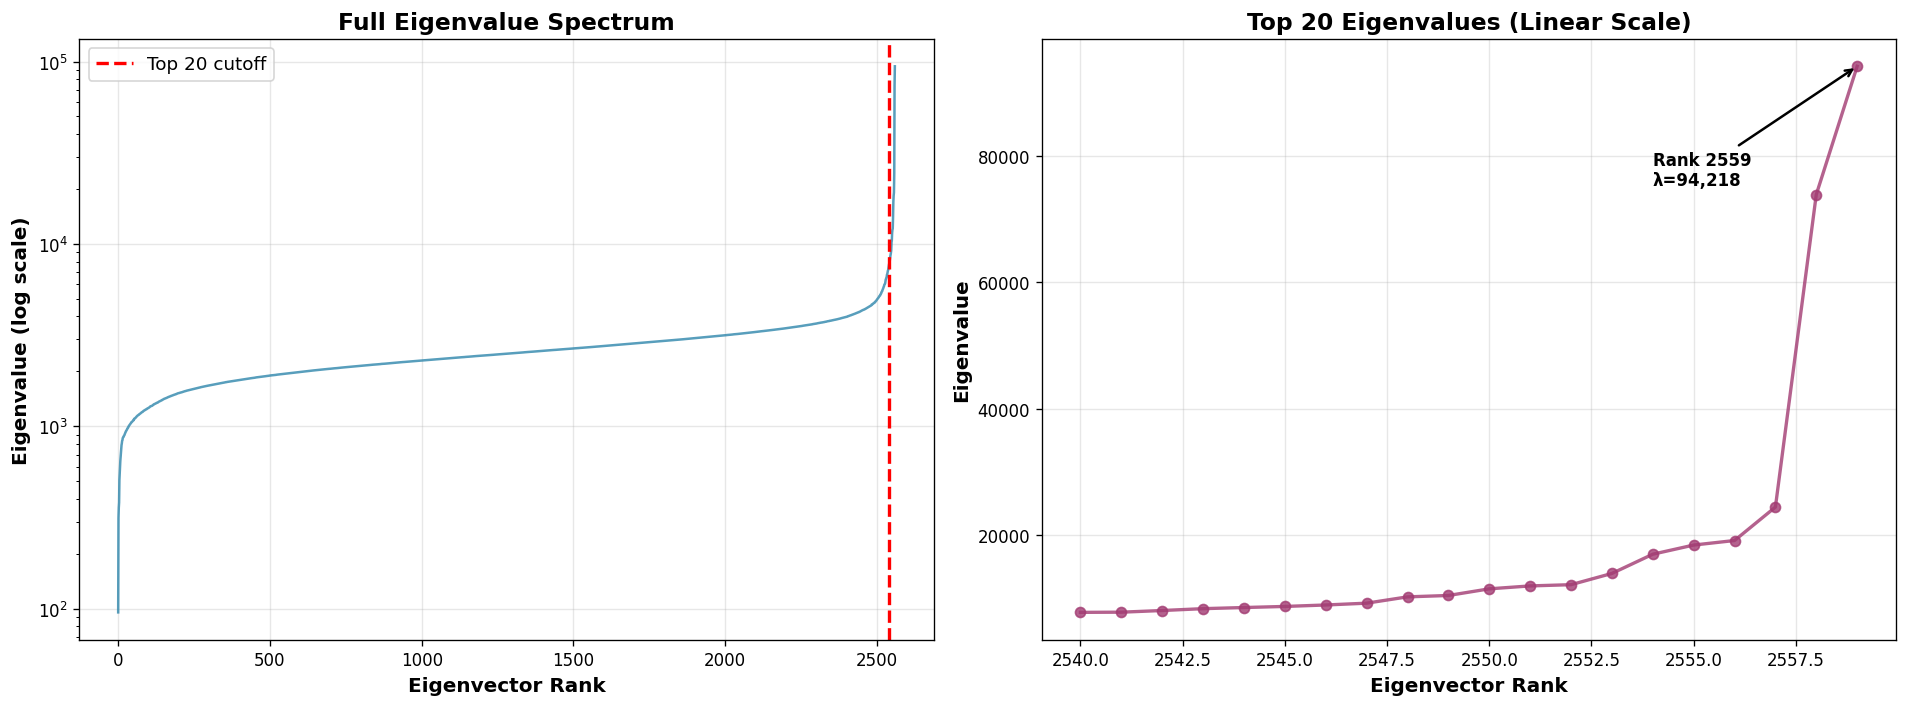


✓ Eigenvalue spectrum plotted


In [4]:
print("\n" + "=" * 80)
print("EIGENVALUE SPECTRUM ANALYSIS")
print("=" * 80)

eigenvalues_np = eigenvalues.numpy()

# Top N eigenvalues
top_n_values = eigenvalues_np[-TOP_N:]
top_n_ranks = np.arange(hidden_dim - TOP_N, hidden_dim)

print(f"\nTop {TOP_N} eigenvalues:")
print(f"  Min: {top_n_values.min():,.2f}")
print(f"  Max: {top_n_values.max():,.2f}")
print(f"  Ratio (max/min): {top_n_values.max() / top_n_values.min():.1f}×")

print(f"\nAll eigenvalues:")
print(f"  Min: {eigenvalues_np.min():,.2f}")
print(f"  Max: {eigenvalues_np.max():,.2f}")
print(f"  Ratio (max/min): {eigenvalues_np.max() / eigenvalues_np.min():.1f}×")

# Plot eigenvalue spectrum
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Full spectrum (log scale)
ax = axes[0]
ax.plot(np.arange(hidden_dim), eigenvalues_np, linewidth=1.5, color='#2E86AB', alpha=0.8)
ax.axvline(hidden_dim - TOP_N, color='red', linestyle='--', linewidth=2, 
           label=f'Top {TOP_N} cutoff')
ax.set_yscale('log')
ax.set_xlabel('Eigenvector Rank', fontsize=12, fontweight='bold')
ax.set_ylabel('Eigenvalue (log scale)', fontsize=12, fontweight='bold')
ax.set_title('Full Eigenvalue Spectrum', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Top N only (linear scale)
ax = axes[1]
ax.plot(top_n_ranks, top_n_values, linewidth=2, color='#A23B72', alpha=0.8, marker='o')
ax.set_xlabel('Eigenvector Rank', fontsize=12, fontweight='bold')
ax.set_ylabel('Eigenvalue', fontsize=12, fontweight='bold')
ax.set_title(f'Top {TOP_N} Eigenvalues (Linear Scale)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Annotate largest
max_idx = top_n_ranks[-1]
max_val = top_n_values[-1]
ax.annotate(f'Rank {max_idx}\nλ={max_val:,.0f}', 
            xy=(max_idx, max_val), xytext=(max_idx-5, max_val*0.8),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Eigenvalue spectrum plotted")

## Cumulative Variance Explained

How much of the total variance is captured by the top N eigenvectors?


CUMULATIVE VARIANCE EXPLAINED

Variance explained by top 20 eigenvectors: 5.54%
Variance explained by remaining 2540 eigenvectors: 94.46%
Eigenvectors needed for 90% variance: 2485 (top 76 from highest)
Eigenvectors needed for 95% variance: 2545 (top 16 from highest)
Eigenvectors needed for 99% variance: 2560 (top 1 from highest)


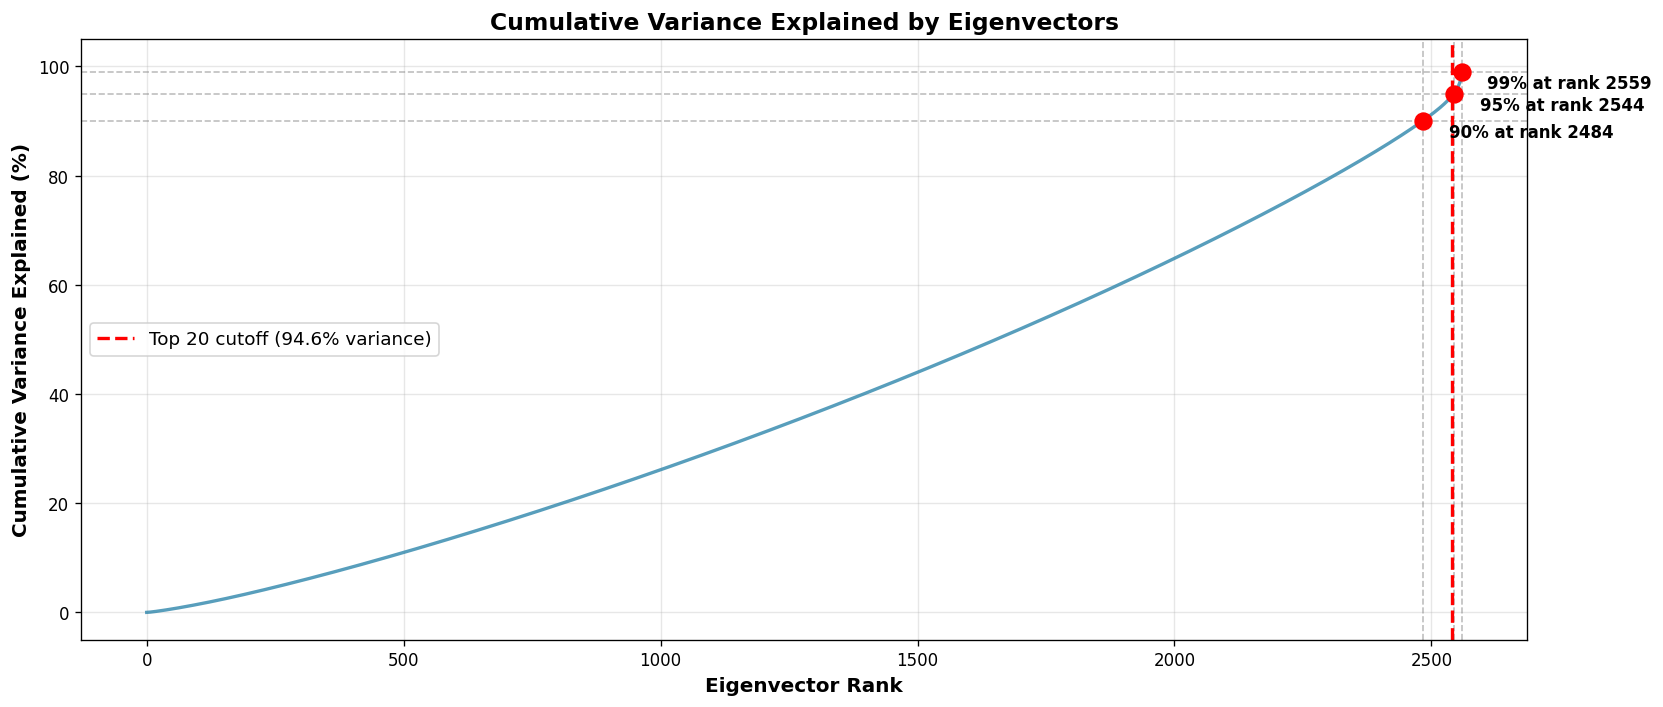


✓ Cumulative variance plot created


In [5]:
print("\n" + "=" * 80)
print("CUMULATIVE VARIANCE EXPLAINED")
print("=" * 80)

# Variance = eigenvalues (in PCA sense)
total_variance = eigenvalues_np.sum()
cumulative_variance = np.cumsum(eigenvalues_np) / total_variance

# Top N contribution
top_n_variance = top_n_values.sum() / total_variance

print(f"\nVariance explained by top {TOP_N} eigenvectors: {top_n_variance*100:.2f}%")
print(f"Variance explained by remaining {hidden_dim - TOP_N} eigenvectors: {(1-top_n_variance)*100:.2f}%")

# Find how many eigenvectors needed for 90%, 95%, 99%
for threshold in [0.90, 0.95, 0.99]:
    n_needed = np.searchsorted(cumulative_variance, threshold) + 1
    print(f"Eigenvectors needed for {threshold*100:.0f}% variance: {n_needed} (top {hidden_dim - n_needed + 1} from highest)")

# Plot cumulative variance
fig, ax = plt.subplots(figsize=(14, 6), dpi=120)

ax.plot(np.arange(hidden_dim), cumulative_variance * 100, 
        linewidth=2, color='#2E86AB', alpha=0.8)

# Mark thresholds
for threshold in [0.90, 0.95, 0.99]:
    n_needed = np.searchsorted(cumulative_variance, threshold)
    ax.axhline(threshold*100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.axvline(n_needed, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.scatter([n_needed], [threshold*100], s=100, color='red', zorder=10)
    ax.text(n_needed + 50, threshold*100 - 3, f'{threshold*100:.0f}% at rank {n_needed}',
            fontsize=10, fontweight='bold')

# Mark top N cutoff
cutoff_rank = hidden_dim - TOP_N
cutoff_variance = cumulative_variance[cutoff_rank] * 100
ax.axvline(cutoff_rank, color='red', linestyle='--', linewidth=2,
           label=f'Top {TOP_N} cutoff ({cutoff_variance:.1f}% variance)')

ax.set_xlabel('Eigenvector Rank', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=12, fontweight='bold')
ax.set_title('Cumulative Variance Explained by Eigenvectors', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Cumulative variance plot created")

---

# Radial Density: Top N Eigenvectors

Detailed radial density histograms for each of the top N eigenvectors.

In [6]:
print("\n" + "=" * 80)
print(f"COMPUTING RADIAL DISTANCES FOR TOP {TOP_N} EIGENVECTORS")
print("=" * 80)

projections_np = projections.numpy()

# Compute radial distances for top N
radial_distances_top = np.zeros((vocab_size, TOP_N))

for i, rank in enumerate(top_n_ranks):
    # Convert to causal distance: scale by sqrt(eigenvalue)
    scale = np.sqrt(eigenvalues_np[rank])
    causal_proj = scale * projections_np[:, rank]
    
    # Radial distance (absolute value)
    radial_distances_top[:, i] = np.abs(causal_proj)

print(f"✓ Radial distances computed for top {TOP_N} eigenvectors\n")


COMPUTING RADIAL DISTANCES FOR TOP 20 EIGENVECTORS
✓ Radial distances computed for top 20 eigenvectors



## Radial Density Histograms Grid

Creating radial density histogram grid...



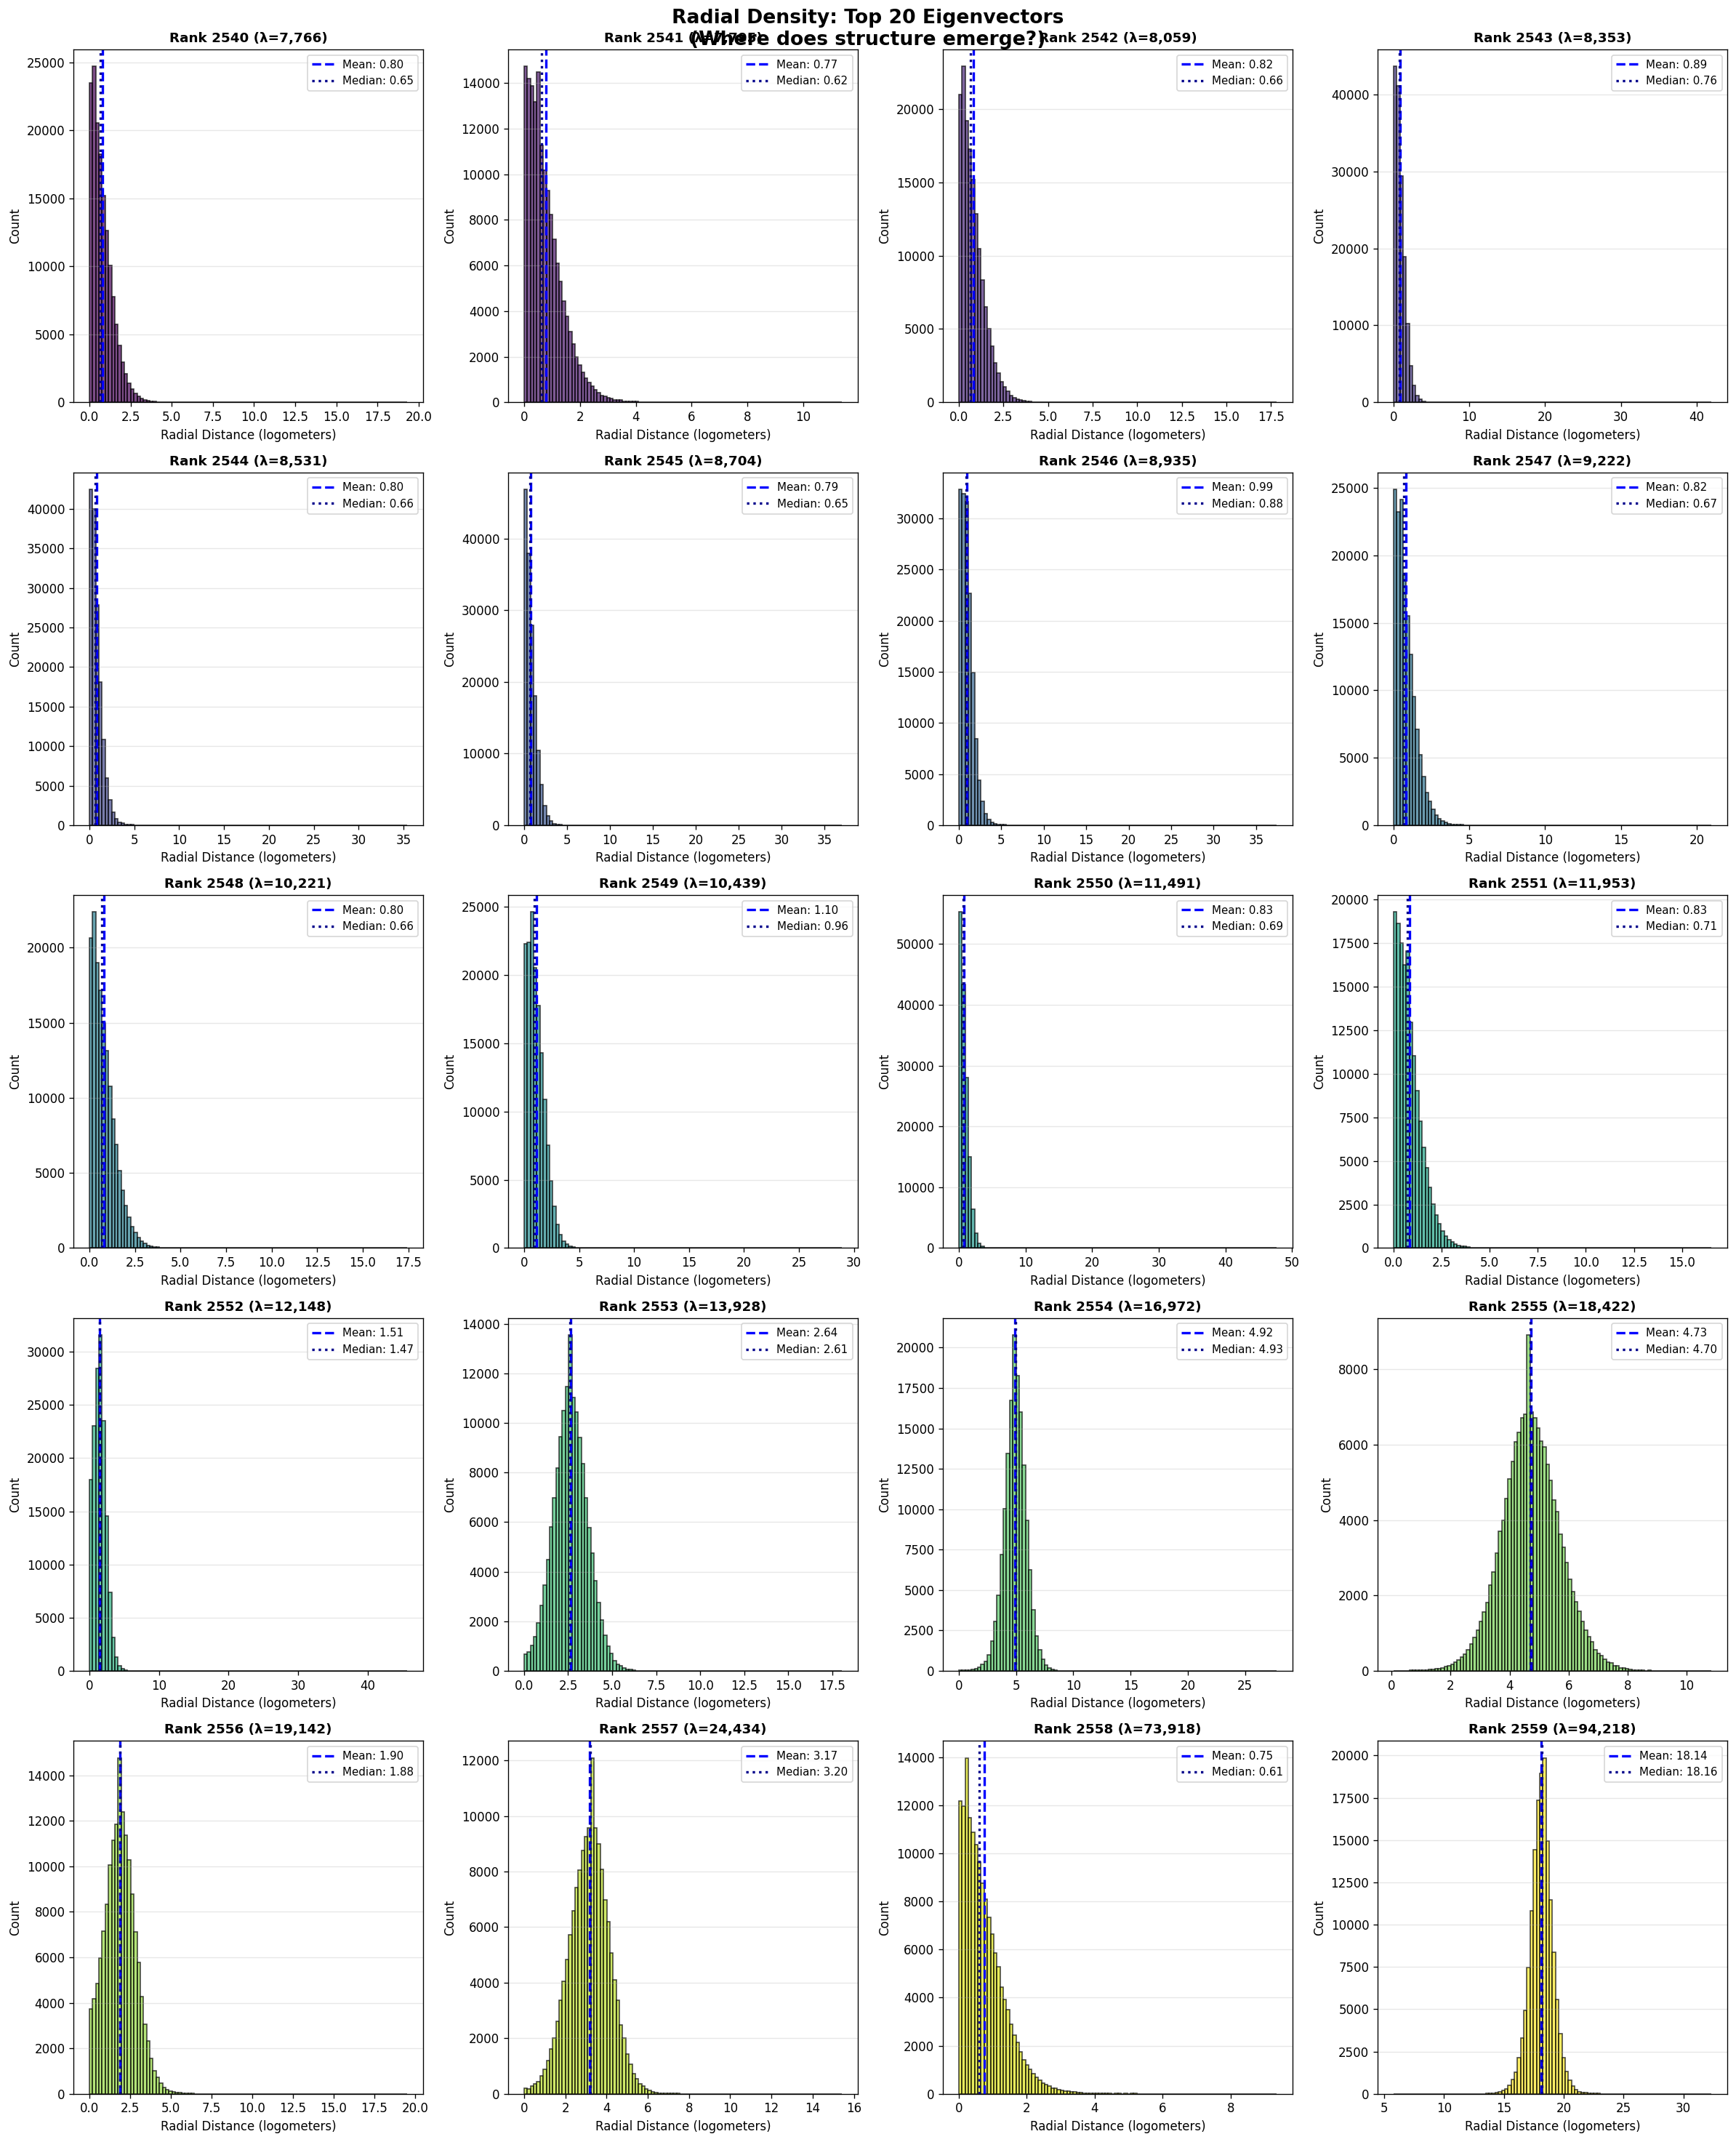

✓ Radial density histogram grid created


In [7]:
print("Creating radial density histogram grid...\n")

# Determine grid size
n_cols = 4
n_rows = int(np.ceil(TOP_N / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows), dpi=120)
axes = axes.flatten() if TOP_N > 1 else [axes]

# Color gradient
colors_gradient = plt.cm.viridis(np.linspace(0, 1, TOP_N))

for i, rank in enumerate(top_n_ranks):
    ax = axes[i]
    radii = radial_distances_top[:, i]
    
    # Histogram
    counts, bins, patches = ax.hist(radii, bins=RADIAL_BINS,
                                      color=colors_gradient[i], alpha=0.7, edgecolor='black')
    
    # Mark mean and median
    mean_r = radii.mean()
    median_r = np.median(radii)
    
    ax.axvline(mean_r, color='blue', linestyle='--', linewidth=2,
               label=f'Mean: {mean_r:.2f}')
    ax.axvline(median_r, color='darkblue', linestyle=':', linewidth=2,
               label=f'Median: {median_r:.2f}')
    
    # Labels
    eigenval = eigenvalues_np[rank]
    ax.set_title(f'Rank {rank} (λ={eigenval:,.0f})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Radial Distance (logometers)', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

# Hide unused subplots
for i in range(TOP_N, len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Radial Density: Top {TOP_N} Eigenvectors\n(Where does structure emerge?)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Radial density histogram grid created")

---

# Zoomed 2D Heatmap: Top N Only

Recreate the 2D radial density heatmap but only for the top N eigenvectors.


CREATING ZOOMED 2D HEATMAP (TOP 20 ONLY)

Computing 2D histogram for top 20 eigenvectors...

✓ 2D histogram computed


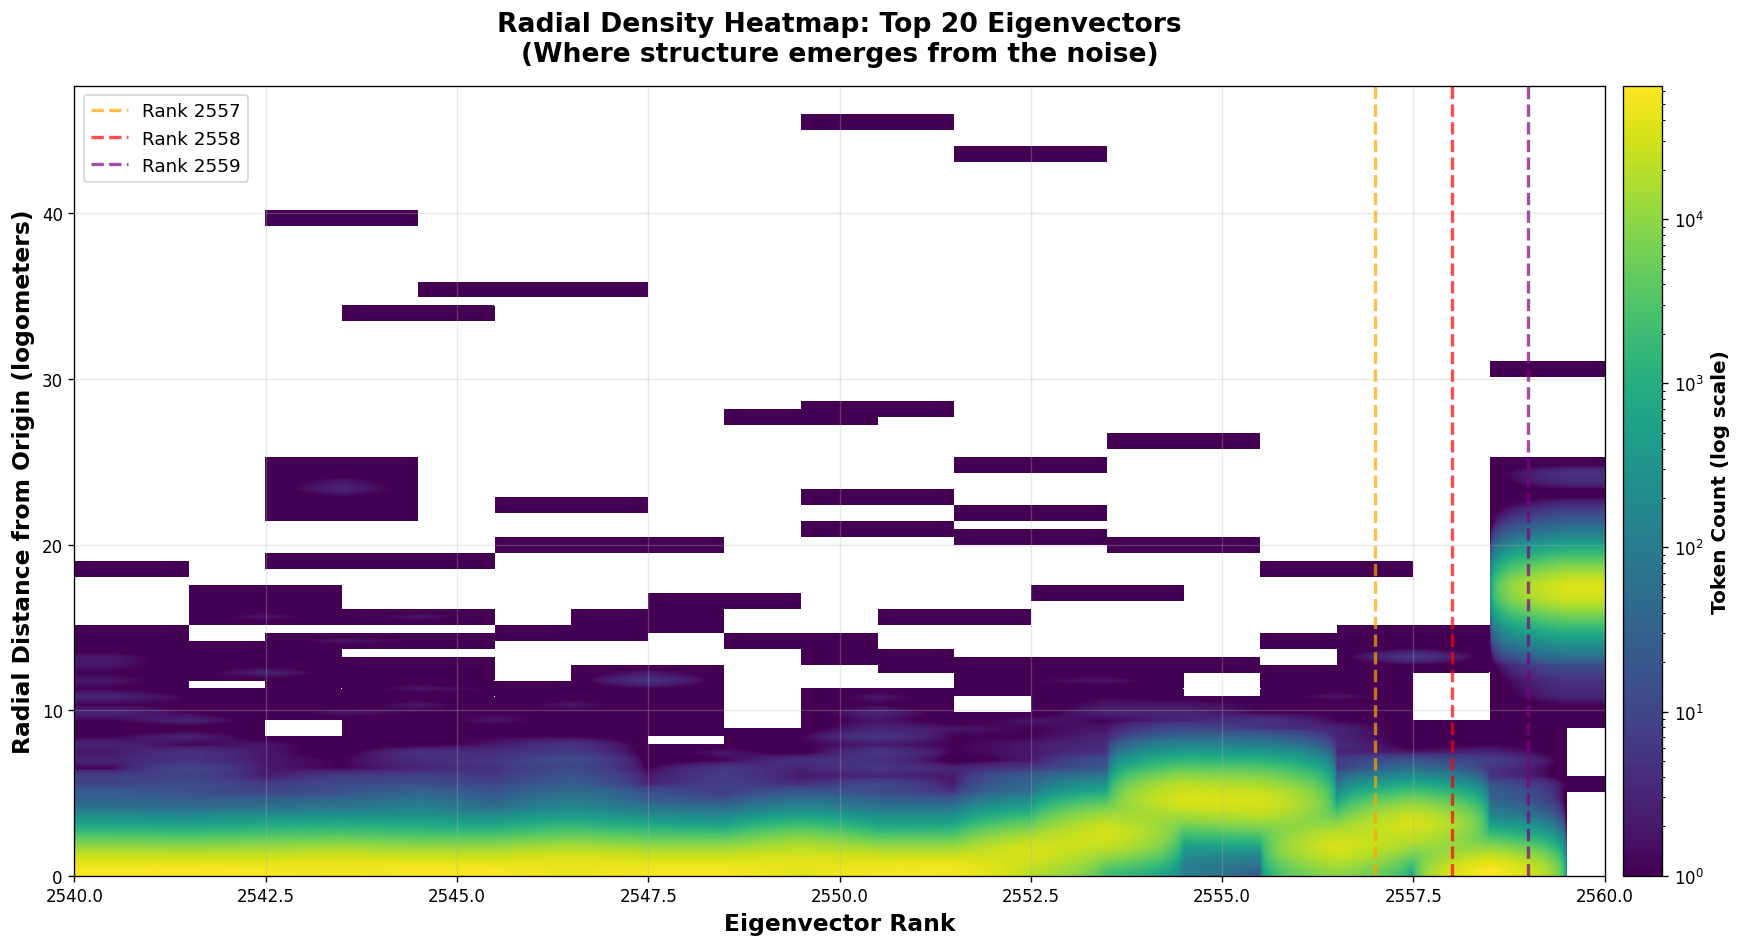


✓ Zoomed 2D heatmap created


In [8]:
print("\n" + "=" * 80)
print(f"CREATING ZOOMED 2D HEATMAP (TOP {TOP_N} ONLY)")
print("=" * 80)

print(f"\nComputing 2D histogram for top {TOP_N} eigenvectors...\n")

# Define bins
rank_bins_top = np.arange(TOP_N + 1)  # One bin per eigenvector
radial_bins = np.linspace(0, radial_distances_top.max() * 1.05, RADIAL_BINS)

# Create arrays for 2D histogram
rank_array = np.repeat(np.arange(TOP_N), vocab_size)
radial_array = radial_distances_top.T.flatten()

hist_2d, rank_edges, radial_edges = np.histogram2d(
    rank_array, radial_array,
    bins=[rank_bins_top, radial_bins]
)

print(f"✓ 2D histogram computed")

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

# Plot with log scale
im = ax.imshow(hist_2d.T,
               aspect='auto',
               origin='lower',
               extent=[top_n_ranks[0], top_n_ranks[-1]+1, 0, radial_distances_top.max()],
               cmap='viridis',
               norm=LogNorm(vmin=1, vmax=hist_2d.max()),
               interpolation='bilinear')

# Colorbar
cbar = plt.colorbar(im, ax=ax, pad=0.01)
cbar.set_label('Token Count (log scale)', fontsize=12, fontweight='bold')

# Mark special eigenvectors
special_colors = {0: 'green', 2557: 'orange', 2558: 'red', 2559: 'purple'}
for rank, color in special_colors.items():
    if rank in top_n_ranks:
        ax.axvline(rank, color=color, linestyle='--', linewidth=2, alpha=0.7,
                   label=f'Rank {rank}')

# Labels
ax.set_xlabel('Eigenvector Rank', fontsize=14, fontweight='bold')
ax.set_ylabel('Radial Distance from Origin (logometers)', fontsize=14, fontweight='bold')
ax.set_title(f'Radial Density Heatmap: Top {TOP_N} Eigenvectors\n(Where structure emerges from the noise)',
             fontsize=16, fontweight='bold', pad=15)
if len(special_colors) > 0:
    ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Zoomed 2D heatmap created")

## Distribution Shape Classification

For each of the top N eigenvectors, classify the radial distribution:
- **Shell-like:** Peaked distribution away from origin
- **Gaussian:** Symmetric bell curve
- **Exponential decay:** Concentration near origin, long tail
- **Uniform:** Flat distribution

In [9]:
print("\n" + "=" * 80)
print("DISTRIBUTION SHAPE CLASSIFICATION")
print("=" * 80)

print(f"\n{'Rank':<6} {'Eigenvalue':<15} {'Mean r':<10} {'Median r':<10} {'Peak r':<10} {'Std':<10} {'Shape'}")
print("=" * 100)

for i, rank in enumerate(top_n_ranks):
    radii = radial_distances_top[:, i]
    eigenval = eigenvalues_np[rank]
    
    mean_r = radii.mean()
    median_r = np.median(radii)
    std_r = radii.std()
    
    # Find peak
    counts, bin_edges = np.histogram(radii, bins=RADIAL_BINS)
    peak_bin = np.argmax(counts)
    peak_r = (bin_edges[peak_bin] + bin_edges[peak_bin + 1]) / 2
    
    # Classify shape
    # Shell-like: peak far from zero, mean ≈ peak
    # Exponential: peak at zero, mean > median
    # Gaussian: peak ≈ mean ≈ median
    
    if peak_r < mean_r * 0.3:  # Peak near origin
        if mean_r > median_r * 1.2:
            shape = "Exponential decay"
        else:
            shape = "Concentrated at origin"
    elif abs(peak_r - mean_r) < std_r * 0.5:  # Peak near mean
        if std_r / mean_r < 0.3:  # Tight distribution
            shape = "Sharp shell"
        else:
            shape = "Gaussian/shell"
    else:
        shape = "Asymmetric"
    
    print(f"{rank:<6} {eigenval:>14,.0f} {mean_r:>9.2f} {median_r:>10.2f} {peak_r:>9.2f} {std_r:>9.2f}  {shape}")

print("\nShape classification heuristics:")
print("  - Sharp shell: Peak ≈ mean, low CV (std/mean < 0.3)")
print("  - Gaussian/shell: Peak ≈ mean, moderate spread")
print("  - Exponential decay: Peak near zero, mean > median")
print("  - Concentrated at origin: Peak and median near zero")


DISTRIBUTION SHAPE CLASSIFICATION

Rank   Eigenvalue      Mean r     Median r   Peak r     Std        Shape
2540            7,766      0.80       0.65      0.29      0.66  Asymmetric
2541            7,795      0.77       0.62      0.06      0.63  Exponential decay
2542            8,059      0.82       0.66      0.27      0.66  Asymmetric
2543            8,353      0.89       0.76      0.21      0.71  Concentrated at origin
2544            8,531      0.80       0.66      0.18      0.67  Exponential decay
2545            8,704      0.79       0.65      0.19      0.65  Exponential decay
2546            8,935      0.99       0.88      0.19      0.74  Concentrated at origin
2547            9,222      0.82       0.67      0.10      0.66  Exponential decay
2548           10,221      0.80       0.66      0.26      0.63  Asymmetric
2549           10,439      1.10       0.96      0.72      0.78  Gaussian/shell
2550           11,491      0.83       0.69      0.24      0.68  Exponential decay
255

---

# Summary

**What we found:** Detailed structure of the top N eigenvectors.

**Key findings:**
- [Run notebook to see results!]

**Interpretation:**
- **Eigenvalue spectrum** shows where variance concentrates
- **Top N eigenvectors** contain the geometric structure of the token cloud
- **Radial density patterns** reveal which directions have clear shells vs. noise
- **Cumulative variance** quantifies dimensionality of the true structure

**Physical picture:**
The token cloud lives in a LOW-DIMENSIONAL subspace:
- Most eigenvectors (ranks 0-2540): perpendicular noise, gaussian distributions near origin
- Top ~10-20 eigenvectors (ranks 2540-2559): real geometric structure emerges
- Different top eigenvectors show different patterns (shells, gaussians, exponential decay)

This explains the 99.7% perpendicularity: tokens occupy a ~10-20 dimensional subspace embedded in 2560D space.